# **HEART DISEASE PREDICTOR**
#### DATA SCIENCE AND MACHINE LEARNING PROJECT<br>
#### **ALYAN PREMANI**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [4]:
#splitting the data set to test and train
df = pd.read_csv("heart.csv")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=11, stratify=df['HeartDisease'])

train_df.to_csv("heart_train.csv", index=False)
test_df.to_csv("heart_test.csv", index=False)

In [5]:
for column in df.columns:
    print(f"{column} -> {train_df[column].unique()}")

Age -> [39 55 71 38 41 72 51 67 48 70 64 60 54 62 45 53 44 46 49 61 57 47 58 59
 52 43 50 69 56 42 63 34 32 31 40 36 37 65 74 35 66 30 68 73 29 77 33 76
 75 28]
Sex -> ['F' 'M']
ChestPainType -> ['NAP' 'ASY' 'ATA' 'TA']
RestingBP -> [110 140 130  92 150 160 120 138 122 180 158 125 115 128 118 132 152 105
 131 134 135 142 126 136 112 144 102 192 155 200  95 178 124 133 170 165
 100  96 104 174 143 145 137 127 106 116 154 185 108 114 123 117 139 156
 146 101  98 190 129 172  80 164  94   0 148]
Cholesterol -> [182 217 221 117 171 123 298 237 238 214 320   0 325 305 208 216 234 245
 365 235 169 219 186 263 260 342 269 292 274 142 275 232 310 297 177 247
 203 268 215 273 250 283 193 228 291 318 239 315 266 257 255 407 340 341
 175 198 224 204 149 210 244 270 300 284 209 187 354 246 307 173 152 417
 277 222 384 195 249 258 240 183 231 226 218 392 165 289 336 288 223 253
 339 212 166 156 160 230 276 409 180 281 207 327 236 303 306 279 251 225
 312 282 243 185 174 202 319 201 265 412 295 311 

## EDA(Exploratory Data Analysis)
we will analyze our data and figure out trends by plotting. We will also clean our data and check for null values.

In [6]:
#read the csv file
df=pd.read_csv("heart_train.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,39,F,NAP,110,182,0,ST,180,N,0.0,Up,0
1,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
2,71,M,ASY,130,221,0,ST,115,Y,0.0,Flat,1
3,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
4,41,M,ASY,150,171,0,Normal,128,Y,1.5,Flat,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [8]:
df.shape

(734, 12)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.361035,132.388283,198.598093,0.228883,136.963215,0.910627,0.553134
std,9.356610,18.647310,108.969115,0.420400,24.969286,1.080660,0.497508
min,28.000000,0.000000,0.000000,0.000000,67.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,265.750000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


In [10]:
#printing the unique values of each feature
for column in df.columns:
    print(f"{column} -> {df[column].unique()}")


Age -> [39 55 71 38 41 72 51 67 48 70 64 60 54 62 45 53 44 46 49 61 57 47 58 59
 52 43 50 69 56 42 63 34 32 31 40 36 37 65 74 35 66 30 68 73 29 77 33 76
 75 28]
Sex -> ['F' 'M']
ChestPainType -> ['NAP' 'ASY' 'ATA' 'TA']
RestingBP -> [110 140 130  92 150 160 120 138 122 180 158 125 115 128 118 132 152 105
 131 134 135 142 126 136 112 144 102 192 155 200  95 178 124 133 170 165
 100  96 104 174 143 145 137 127 106 116 154 185 108 114 123 117 139 156
 146 101  98 190 129 172  80 164  94   0 148]
Cholesterol -> [182 217 221 117 171 123 298 237 238 214 320   0 325 305 208 216 234 245
 365 235 169 219 186 263 260 342 269 292 274 142 275 232 310 297 177 247
 203 268 215 273 250 283 193 228 291 318 239 315 266 257 255 407 340 341
 175 198 224 204 149 210 244 270 300 284 209 187 354 246 307 173 152 417
 277 222 384 195 249 258 240 183 231 226 218 392 165 289 336 288 223 253
 339 212 166 156 160 230 276 409 180 281 207 327 236 303 306 279 251 225
 312 282 243 185 174 202 319 201 265 412 295 311 

In [11]:
#check for missing/null values in our dataset
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Feature Info
**Age**: age of the patient [years]<br>
**Sex**: sex of the patient [M: Male, F: Female]<br>
**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic(no symptoms)]<br>
**RestingBP**: resting blood pressure [mm Hg]<br>
**Cholesterol**: serum cholesterol [mm/dl]<br>
**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]<br>
**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]<br>
**Oldpeak**: oldpeak = ST [Numeric value measured in depression]<br>
**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
**HeartDisease**: output class [1: heart disease, 0: Normal]<br>

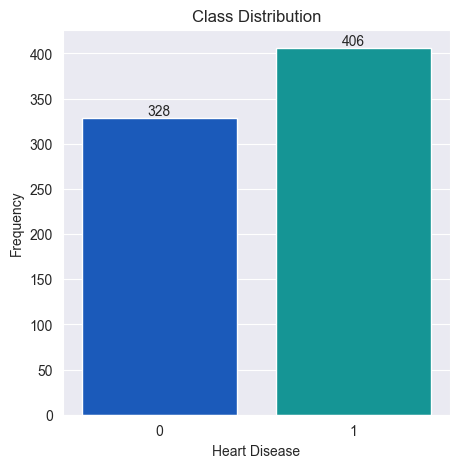

In [12]:
#plotting to see the class distribution
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
plot = sns.countplot(df,x="HeartDisease",palette="winter", hue="HeartDisease",legend=False)

for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Class Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.savefig("Class distribution")
plt.show()


The class distribution is correct and there is **ALMOST NO** class imbalance. We can work with this data

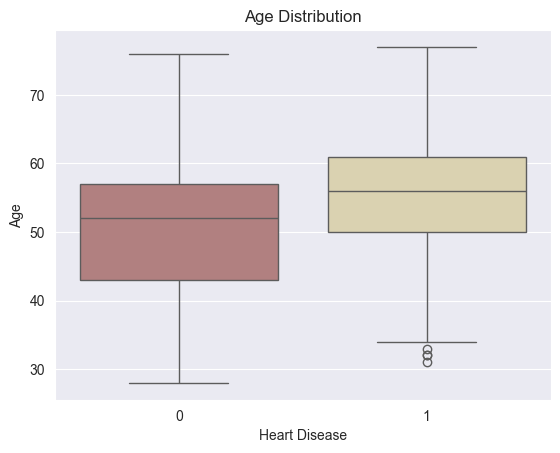

In [13]:
sns.boxplot(data=df,x='HeartDisease', y='Age',palette="pink",hue="HeartDisease",legend=False)
plt.title("Age Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.savefig("Age_dist_box")
plt.show()


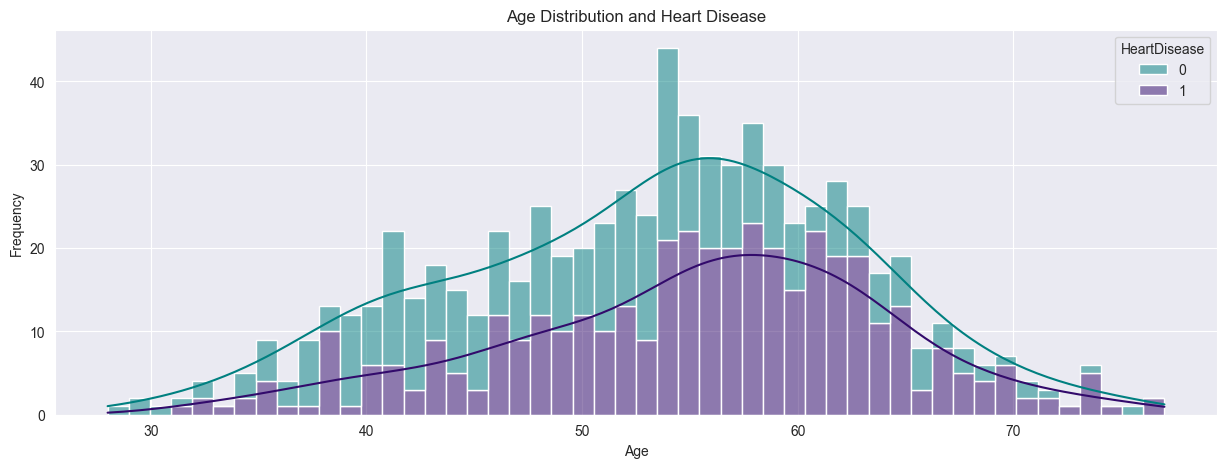

In [14]:
#plotting to see the Age distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="Age",palette=custom_palette,bins=50, hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Age Distribution and Heart Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("Age_dist")
plt.show()

#### Insights
The heart diseases increase with increasing age with it rising sharply after the age of 50<br>
High risk ages are in the 55-65 range<br>
There are very few cases under the age of 30<br>

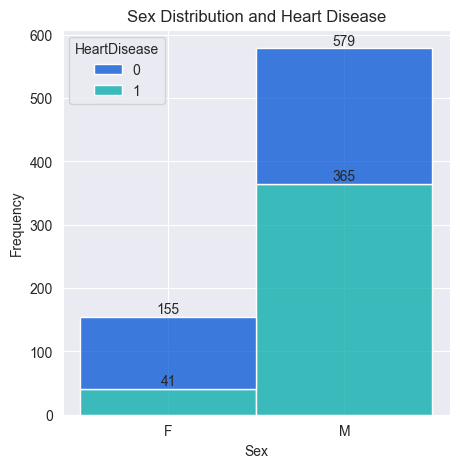

In [15]:
#plotting to see the Sex distribution and relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="Sex",palette="winter",hue="HeartDisease",bins=2,multiple="stack")
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Sex Distribution and Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.savefig("Sex_dist")
plt.show()

In [16]:
df["Sex"].value_counts()

Sex
M    579
F    155
Name: count, dtype: int64

#### Insights
Out of 725 Males 458 had a heart disease<br>
Out of 193 Females 50 had a heart disease<br>
This gives us the insight that Males are much more likely to suffer from a heart disease<br>
Sex is an important feature in our dataset<br>

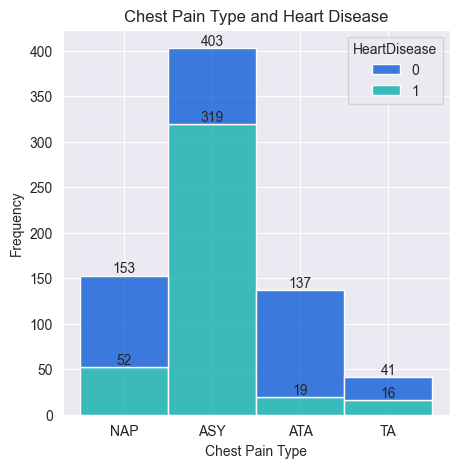

In [17]:
#plotting to see the Chest pain types and their relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="ChestPainType",palette="winter",hue="HeartDisease",multiple="stack")
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Chest Pain Type and Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.savefig("CPT_dist")
plt.show()

#### Insights
patients with NO chest pain symptoms i.e asymptomatic (ASY) have the highest heart disease frequency<br>
patients with Non-Anginal pain (NAP) and Atypical Angina(ATA) have the lowest Heart disease frequency<br>
Chest Pain Type too is an important feature

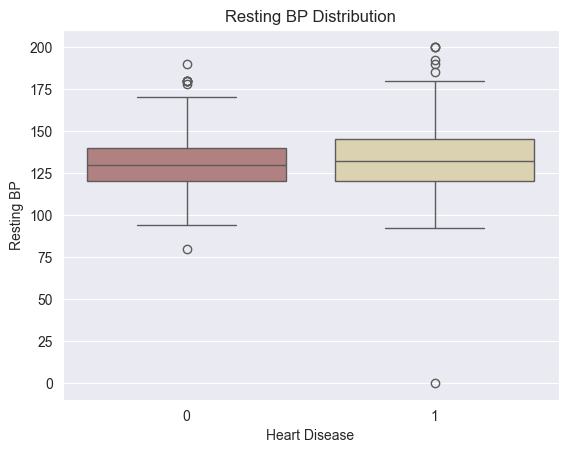

In [18]:
#box plot for Resting blood pressure
sns.boxplot(data=df,x="HeartDisease", y='RestingBP',palette="pink",hue="HeartDisease",legend=False)

plt.title("Resting BP Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Resting BP")

plt.savefig("RestingBP_dist_box")
plt.show()

We can see from the box plot that there is an outlier in our dataset i.e the Resting BP is 0 which is not possible so we will remove this 

In [19]:
# print(df[df["RestingBP"]==0])
pd.crosstab(df["RestingBP"] == 0, df["HeartDisease"])

HeartDisease,0,1
RestingBP,,
False,328,405
True,0,1


In [20]:
#dropping all the RestingBP rows which are 0
df = df[df['RestingBP']>0]

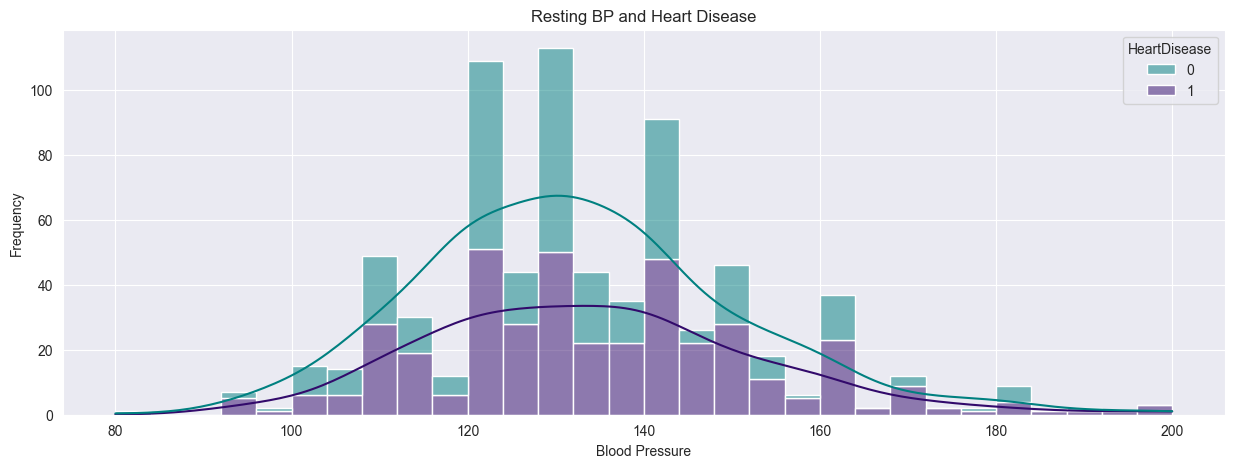

In [21]:
#plotting to see the Resting BP distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="RestingBP",palette=custom_palette,bins=30, hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Resting BP and Heart Disease")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.savefig("RestingBP_dist")
plt.show()

#### Insights
The distribution of Resting blood pressure is highly similar for both classes<br>
Both classes have similar Peaks<br>
There is a high overlap between both the classes<br>
Therefore, we can conclude that RestingBP weakly discriminates between the two classes<br>

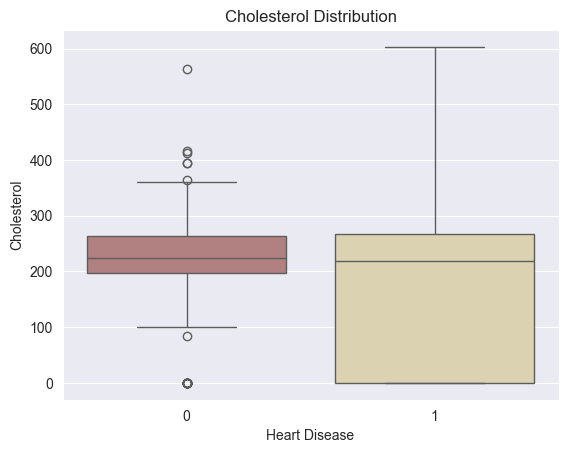

In [22]:
#box plot for cholesterol
sns.boxplot(data=df,x="HeartDisease", y='Cholesterol',palette="pink",hue="HeartDisease",legend=False)

plt.title("Cholesterol Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")

plt.savefig("Cholesterol_dist_box")
plt.show()

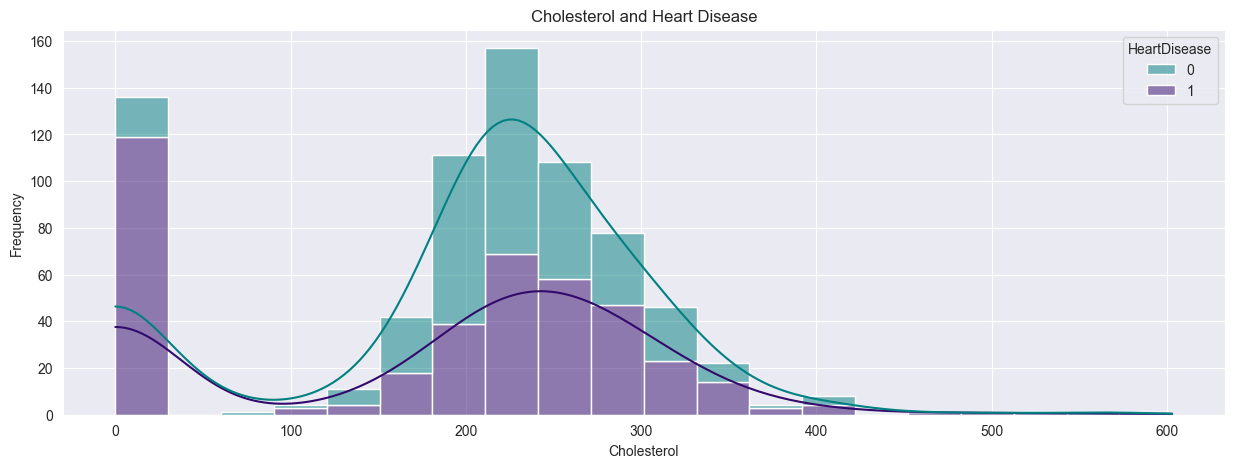

In [23]:
#plotting to see the Cholesterol distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="Cholesterol",palette=custom_palette,bins=20, hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Cholesterol and Heart Disease")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.savefig("Cholesterol_dist")
plt.show()

In [24]:
print(df[df["Cholesterol"]==0])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
11    70   M           ASY        140            0          1     Normal   
16    62   M           ASY        115            0          1     Normal   
22    41   M           ASY        125            0          1     Normal   
30    60   M           ASY        152            0          0         ST   
31    38   F           ASY        105            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
685   56   M           ASY        120            0          0         ST   
703   50   M           ASY        120            0          0         ST   
704   46   M           ASY        100            0          1         ST   
714   50   F           ASY        160            0          1     Normal   
722   62   F           ASY        120            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
11     157              Y  

In [25]:
pd.crosstab(df["Cholesterol"] == 0, df["HeartDisease"])

HeartDisease,0,1
Cholesterol,,
False,311,286
True,17,119


There are 136 rows which have "Cholesterol" as 0. This is not possible in real world. However we can not drop 171 values as this will result in a class imbalance. We will therfore use KNN imputer which will impute values which we will replace with the zeroes

In [26]:
## Replace zeros with NaN
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = np.nan
test_df.loc[test_df["Cholesterol"] == 0, "Cholesterol"] = np.nan

#KNN to impute the NaN. we are exclusing HeartDisease column to prevent overfitting
imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('HeartDisease')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

test_df_numeric_cols = test_df.select_dtypes(include=[np.number]).columns.drop('HeartDisease')
test_df[test_df_numeric_cols] = imputer.transform(test_df[test_df_numeric_cols])

In [27]:
pd.crosstab(df["Cholesterol"] == 0, df["HeartDisease"])

HeartDisease,0,1
Cholesterol,,
False,328,405


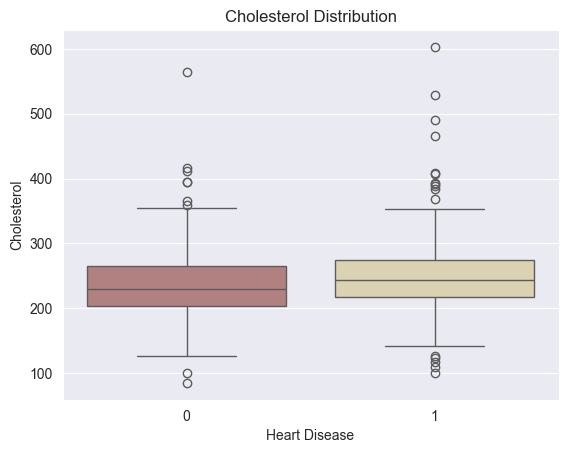

In [28]:
#box plot for Cholesterol with imputed values
sns.boxplot(data=df,x="HeartDisease", y='Cholesterol',palette="pink",hue="HeartDisease",legend=False)

plt.title("Cholesterol Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")

plt.savefig("Cholesterol_dist_box")
plt.show()

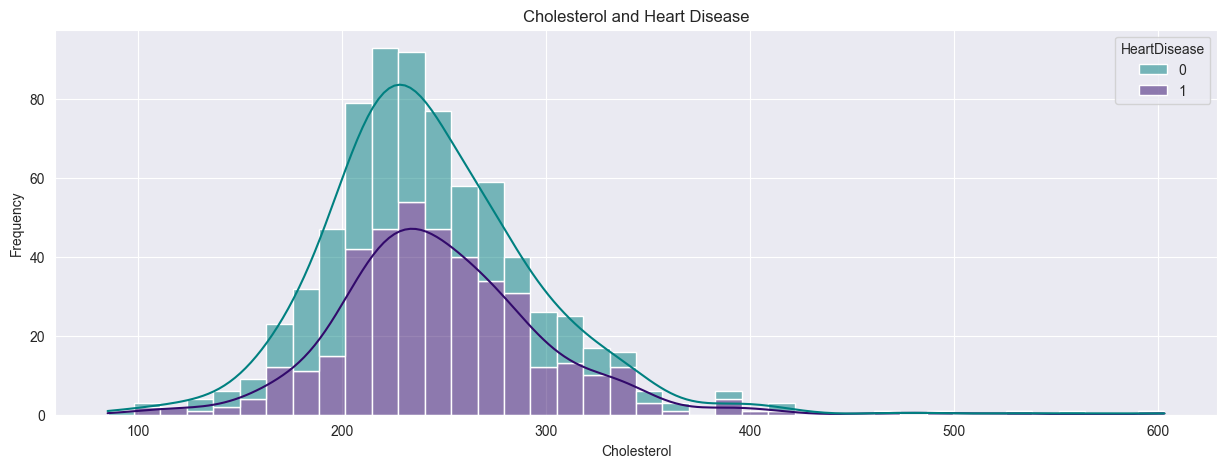

In [29]:
#plotting to see the Resting BP distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="Cholesterol",palette=custom_palette,bins=40, hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Cholesterol and Heart Disease")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.savefig("Cholesterol_dist")
plt.show()

#### Insights
Cholesterol shows moderate discrimination between classes<br>
While there is overlap, heart disease patients tend to have higher cholesterol as compared to healthy patients<br>
Cholesterol is useful but not a very strong predictor 

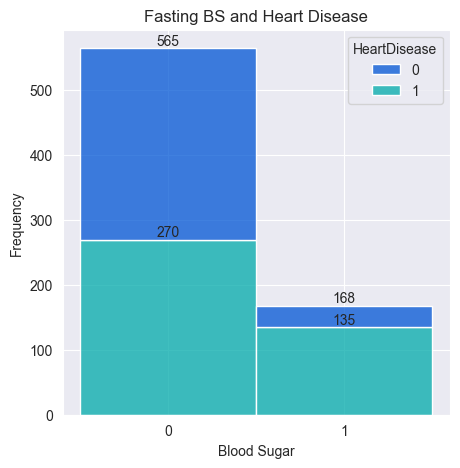

In [30]:
#plotting to see the FastingBS distribution and relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="FastingBS",palette="winter",hue="HeartDisease",bins=2,multiple="stack",binrange=(-0.5, 1.5))
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Fasting BS and Heart Disease")
plt.xlabel("Blood Sugar")
plt.ylabel("Frequency")
plt.xticks([1,0])
plt.savefig("FBS_dist")
plt.show()

#### Insights
Patients with a high FastingBS level i.e 1(greater than 120mg/dl) have a high risk of heart disease<br>
FastingBs is also a key predictor of heart disease

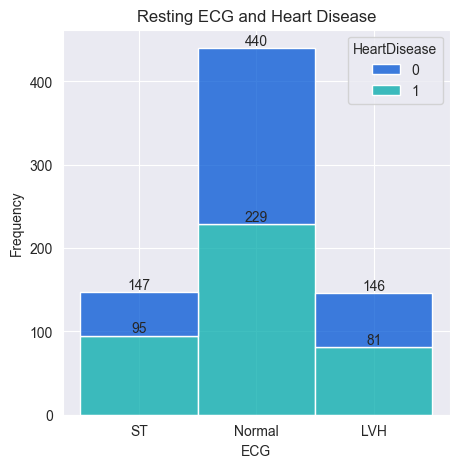

In [31]:
#plotting to see the RestingECG distribution and relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="RestingECG",palette="winter",hue="HeartDisease",bins=2,multiple="stack")
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Resting ECG and Heart Disease")
plt.xlabel("ECG")
plt.ylabel("Frequency")
plt.savefig("ECG_dist")
plt.show()

#### Insights
ST show the strongest association with hear disease<br>
both ST and LVH are less common in our dataset<br>
RestingECG is also a moderate predictor in our dataset

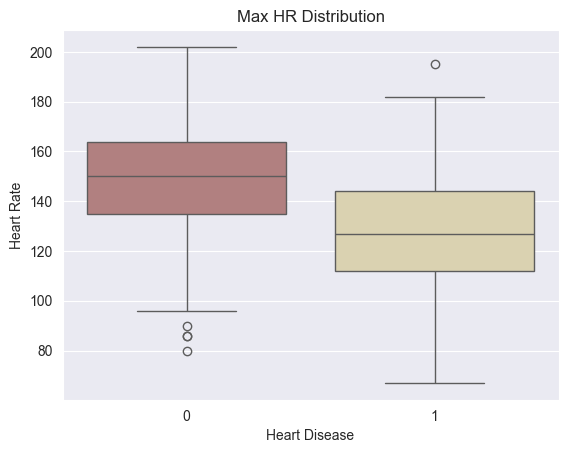

In [32]:
#box plot for Resting BP
sns.boxplot(data=df,x="HeartDisease", y='MaxHR',palette="pink",hue="HeartDisease",legend=False)

plt.title("Max HR Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Heart Rate")

plt.savefig("MaxHR_dist_box")
plt.show()

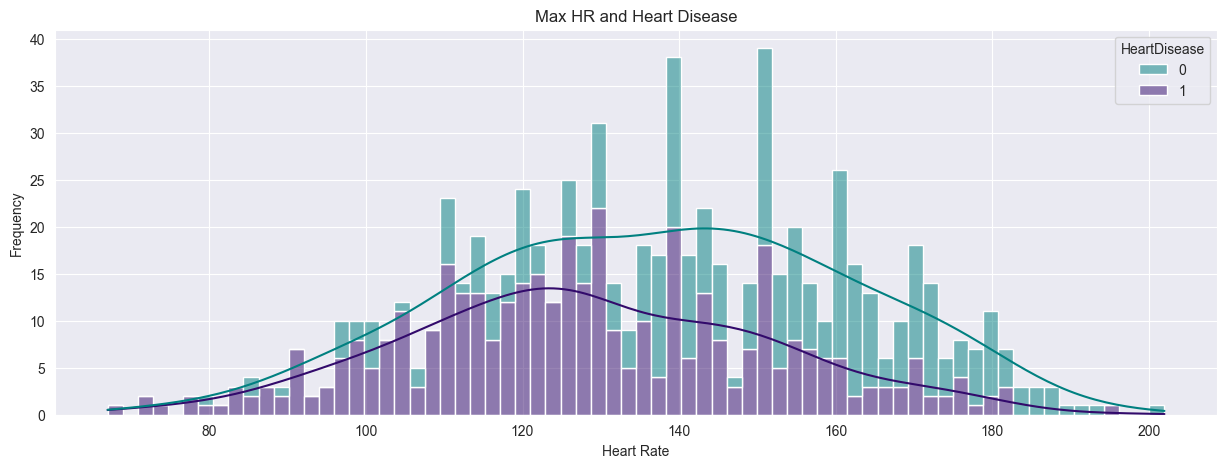

In [33]:
#plotting to see the Max HR distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="MaxHR",palette=custom_palette,bins=70, hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Max HR and Heart Disease")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.savefig("MaxHR_dist")
plt.show()

#### Insights
Heart disease patients generally achieve lower maximum heart rates compared to healthy patients as seen from the plot <br>
This clear separation suggests MaxHR will be a important predictor in our models

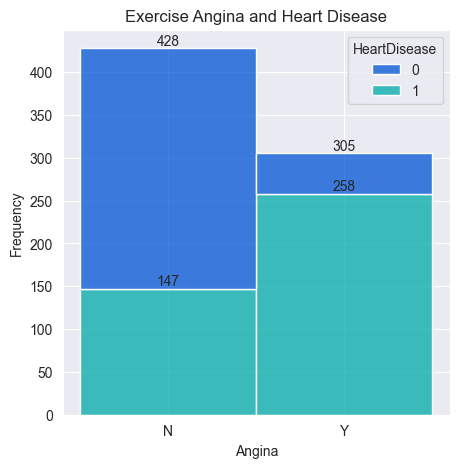

In [34]:
#plotting to see the Exercise Angina distribution and relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="ExerciseAngina",palette="winter",hue="HeartDisease",bins=2,multiple="stack")
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("Exercise Angina and Heart Disease")
plt.xlabel("Angina")
plt.ylabel("Frequency")
plt.savefig("Angina_dist")
plt.show()

#### Insight
Patients with exercise angina have a greater heart disease frequency<br>
Patinets with No exercise angina have a lower hear disease frequency<br>
ExerciseAngina is also a strong predictor in our dataset

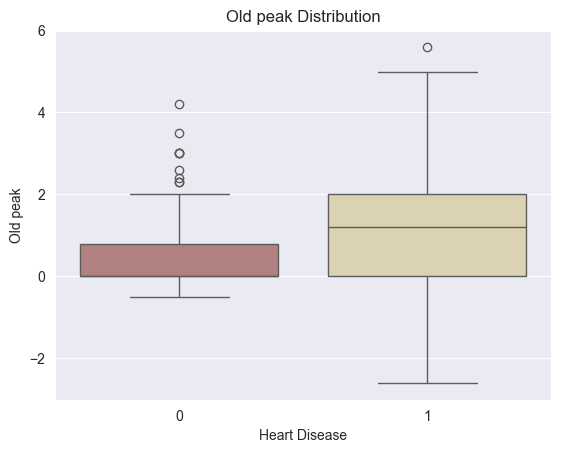

In [35]:
#box plot for oldpeak
sns.boxplot(data=df,x="HeartDisease", y='Oldpeak',palette="pink",hue="HeartDisease",legend=False)

plt.title("Old peak Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Old peak")

plt.savefig("Oldpeak_dist_box")
plt.show()

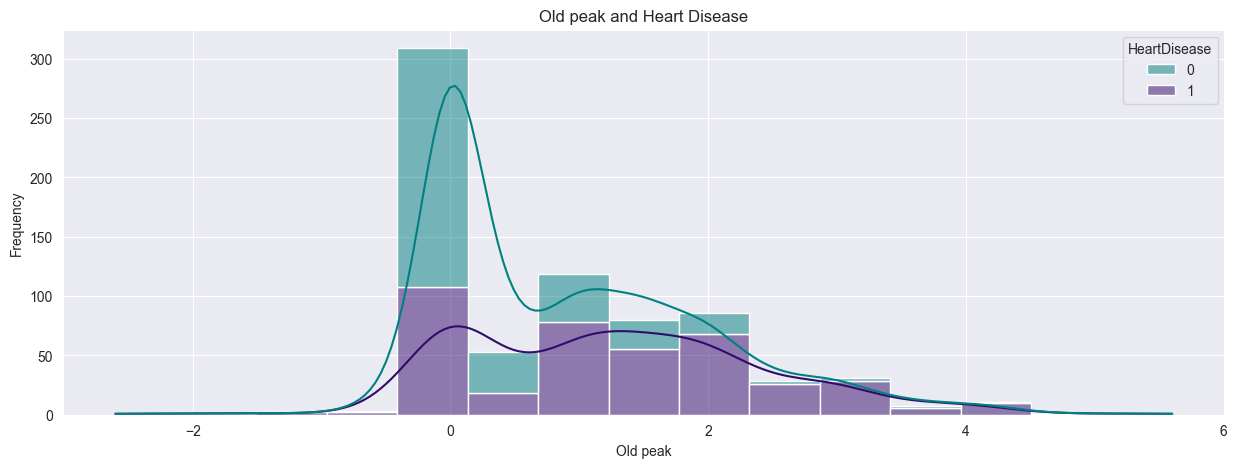

In [36]:
#plotting to see the oldpeak distribution and relation to the heart disease
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="Oldpeak",palette=custom_palette,bins=15,hue="HeartDisease",kde=True,multiple="stack")
    
plt.title("Old peak and Heart Disease")
plt.xlabel("Old peak")
plt.ylabel("Frequency")
plt.savefig("Oldpeak_dist")
plt.show()

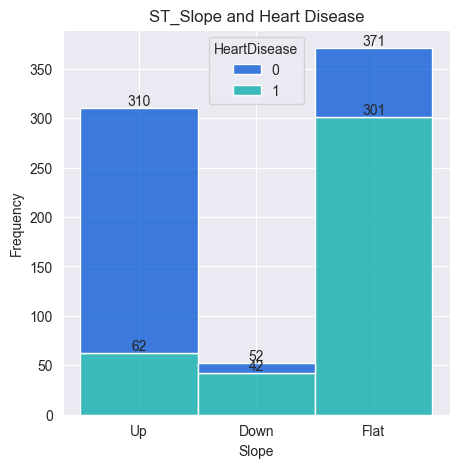

In [37]:
#plotting to see the ST_Slope distribution and relation to the heart disease
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
custom_palette = {"teal","#320A6B"}
plot = sns.histplot(df,x="ST_Slope",palette="winter",hue="HeartDisease",bins=3,multiple="stack")
for container in plot.containers:
    plot.bar_label(container)
    
plt.title("ST_Slope and Heart Disease")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.savefig("st_slope_dist")
plt.show()

#### Insights
The Down and Flat slope show strong association with heart disease<br>
The Up slope is not associated heavily with hear disease<br>
SL_slope is also a good predictor

## Encoding
Our data has categorical values as well which we will have to encode. One hot encoding would be the most suitable encoding method for our data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             733 non-null    float64
 1   Sex             733 non-null    object 
 2   ChestPainType   733 non-null    object 
 3   RestingBP       733 non-null    float64
 4   Cholesterol     733 non-null    float64
 5   FastingBS       733 non-null    float64
 6   RestingECG      733 non-null    object 
 7   MaxHR           733 non-null    float64
 8   ExerciseAngina  733 non-null    object 
 9   Oldpeak         733 non-null    float64
 10  ST_Slope        733 non-null    object 
 11  HeartDisease    733 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 74.4+ KB


In [39]:
#mapping these features directly to prevent additional rows from being created
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

#mapping is also necessary in test dataset
test_df['Sex'] = test_df['Sex'].map({'M': 1, 'F': 0})
test_df['ExerciseAngina'] = test_df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             733 non-null    float64
 1   Sex             733 non-null    int64  
 2   ChestPainType   733 non-null    object 
 3   RestingBP       733 non-null    float64
 4   Cholesterol     733 non-null    float64
 5   FastingBS       733 non-null    float64
 6   RestingECG      733 non-null    object 
 7   MaxHR           733 non-null    float64
 8   ExerciseAngina  733 non-null    int64  
 9   Oldpeak         733 non-null    float64
 10  ST_Slope        733 non-null    object 
 11  HeartDisease    733 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 74.4+ KB


In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,39.0,0,NAP,110.0,182.0,0.0,ST,180.0,0,0.0,Up,0
1,55.0,1,ASY,140.0,217.0,0.0,Normal,111.0,1,5.6,Down,1
2,71.0,1,ASY,130.0,221.0,0.0,ST,115.0,1,0.0,Flat,1
3,38.0,1,ASY,92.0,117.0,0.0,Normal,134.0,1,2.5,Flat,1
4,41.0,1,ASY,150.0,171.0,0.0,Normal,128.0,1,1.5,Flat,0


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 782 to 127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             184 non-null    float64
 1   Sex             184 non-null    int64  
 2   ChestPainType   184 non-null    object 
 3   RestingBP       184 non-null    float64
 4   Cholesterol     184 non-null    float64
 5   FastingBS       184 non-null    float64
 6   RestingECG      184 non-null    object 
 7   MaxHR           184 non-null    float64
 8   ExerciseAngina  184 non-null    int64  
 9   Oldpeak         184 non-null    float64
 10  ST_Slope        184 non-null    object 
 11  HeartDisease    184 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 18.7+ KB


In [43]:
objects = ["ChestPainType","RestingECG","ST_Slope"]
#one-hot encoding
df = pd.get_dummies(df,columns=objects,dtype=int)

test_df = pd.get_dummies(test_df,columns=objects, dtype= int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                733 non-null    float64
 1   Sex                733 non-null    int64  
 2   RestingBP          733 non-null    float64
 3   Cholesterol        733 non-null    float64
 4   FastingBS          733 non-null    float64
 5   MaxHR              733 non-null    float64
 6   ExerciseAngina     733 non-null    int64  
 7   Oldpeak            733 non-null    float64
 8   HeartDisease       733 non-null    int64  
 9   ChestPainType_ASY  733 non-null    int32  
 10  ChestPainType_ATA  733 non-null    int32  
 11  ChestPainType_NAP  733 non-null    int32  
 12  ChestPainType_TA   733 non-null    int32  
 13  RestingECG_LVH     733 non-null    int32  
 14  RestingECG_Normal  733 non-null    int32  
 15  RestingECG_ST      733 non-null    int32  
 16  ST_Slope_Down      733 non-null

In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 782 to 127
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                184 non-null    float64
 1   Sex                184 non-null    int64  
 2   RestingBP          184 non-null    float64
 3   Cholesterol        184 non-null    float64
 4   FastingBS          184 non-null    float64
 5   MaxHR              184 non-null    float64
 6   ExerciseAngina     184 non-null    int64  
 7   Oldpeak            184 non-null    float64
 8   HeartDisease       184 non-null    int64  
 9   ChestPainType_ASY  184 non-null    int32  
 10  ChestPainType_ATA  184 non-null    int32  
 11  ChestPainType_NAP  184 non-null    int32  
 12  ChestPainType_TA   184 non-null    int32  
 13  RestingECG_LVH     184 non-null    int32  
 14  RestingECG_Normal  184 non-null    int32  
 15  RestingECG_ST      184 non-null    int32  
 16  ST_Slope_Down      184 non-nu

In [46]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,39.0,0,110.0,182.0,0.0,180.0,0,0.0,0,0,0,1,0,0,0,1,0,0,1
1,55.0,1,140.0,217.0,0.0,111.0,1,5.6,1,1,0,0,0,0,1,0,1,0,0
2,71.0,1,130.0,221.0,0.0,115.0,1,0.0,1,1,0,0,0,0,0,1,0,1,0
3,38.0,1,92.0,117.0,0.0,134.0,1,2.5,1,1,0,0,0,0,1,0,0,1,0
4,41.0,1,150.0,171.0,0.0,128.0,1,1.5,0,1,0,0,0,0,1,0,0,1,0


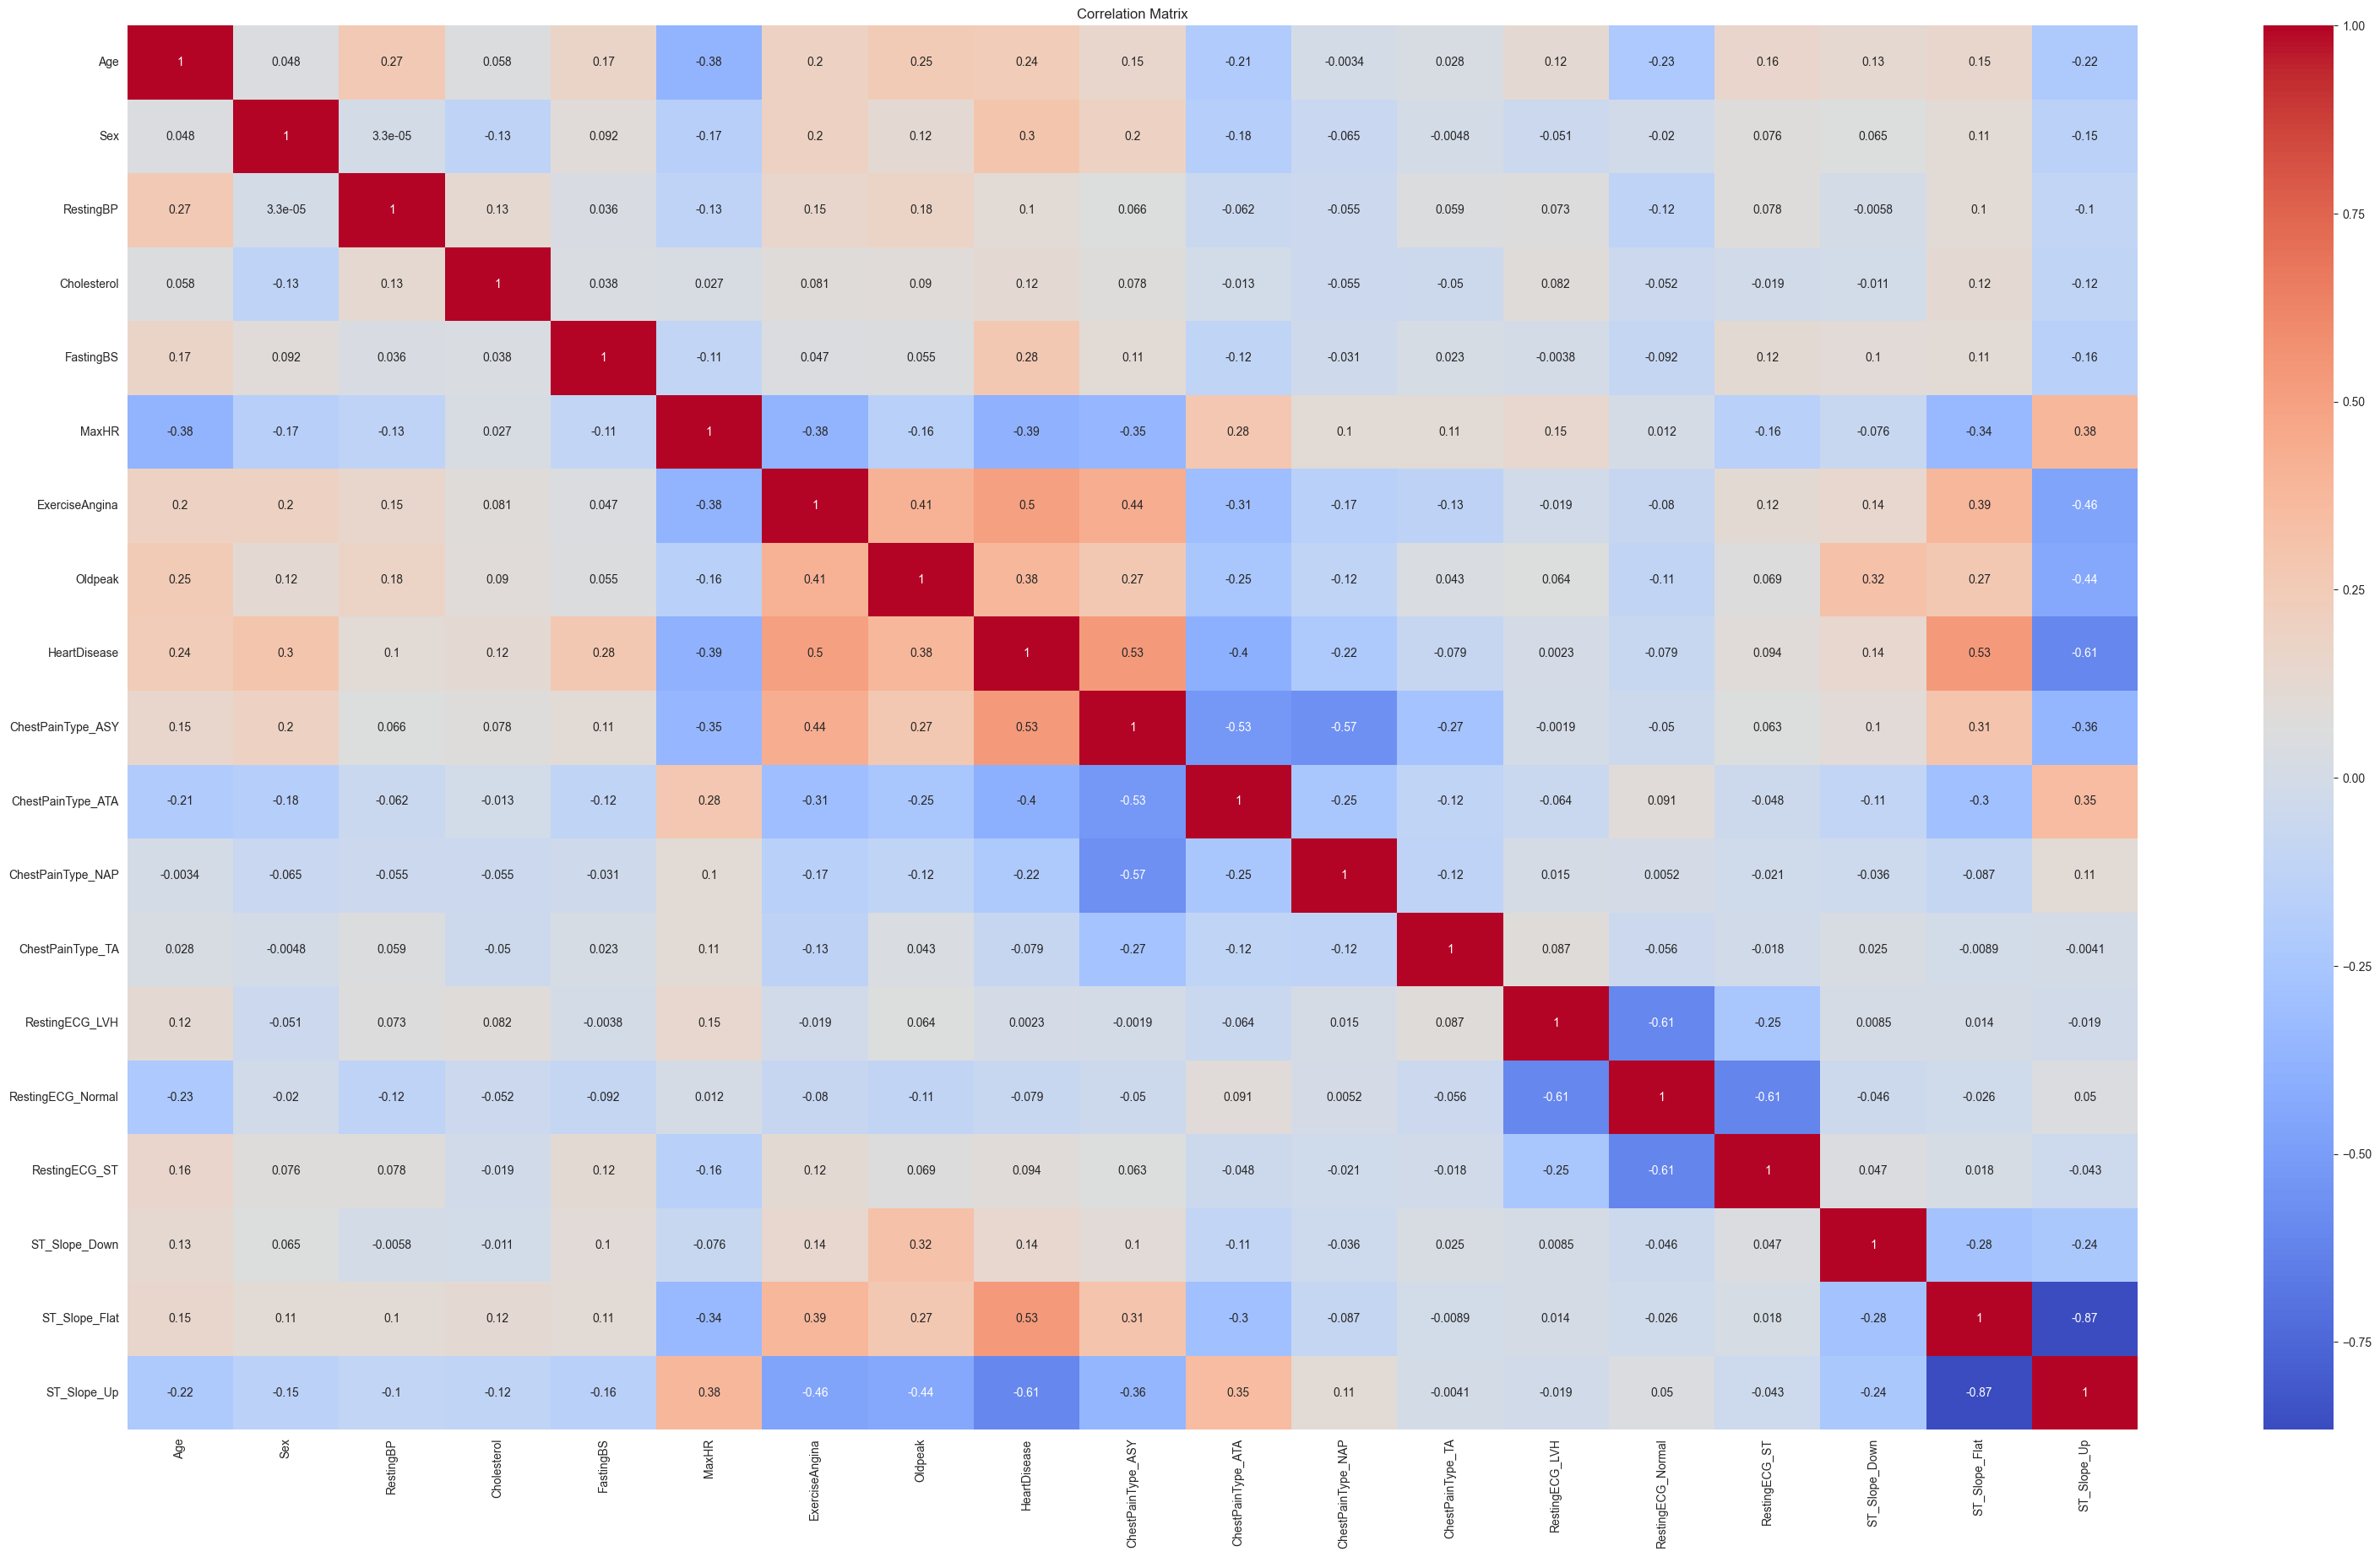

In [47]:
#plotting correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(38.4, 21.6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.savefig("correlation_matrix.png")
plt.show()

In [48]:
best_positive = corr_matrix.index[corr_matrix['HeartDisease']> 0.3]
best_negative = corr_matrix.index[corr_matrix['HeartDisease'] <-0.3]

print("Best features with a positive coorelation")
print(best_positive)
print("\nBest features with a negative coorelation")
print(best_negative)


Best features with a positive coorelation
Index(['ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ST_Slope_Flat'],
      dtype='object')

Best features with a negative coorelation
Index(['MaxHR', 'ChestPainType_ATA', 'ST_Slope_Up'], dtype='object')


In [49]:
X_train =df.drop('HeartDisease', axis=1)
y_train=df['HeartDisease']
X_test = test_df.drop('HeartDisease', axis=1)
y_test = test_df["HeartDisease"]

## MODEL TRAINING
### **RANDOMFOREST CLASSIFIER**

In [50]:
#intializing the model
rand_forest = RandomForestClassifier(random_state=11)
#cross validation. Stratified Kfold is used for classification
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
cv_scores = cross_val_score(rand_forest, X_train, y_train, cv=cv_folds, scoring='accuracy')

print("Cross-Validation Results:")
print(f"Individual fold scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Results:
Individual fold scores: [0.84353741 0.80272109 0.82993197 0.87671233 0.90410959]
Average CV Accuracy: 0.8514


In [51]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [52]:
#testing the model
y_pred = rand_forest.predict(X_test)

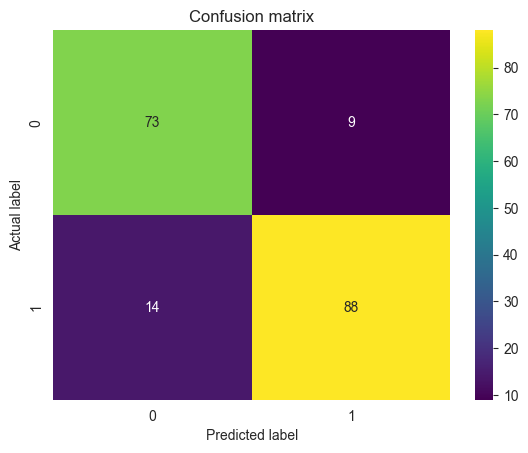

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(conf_matrix),annot=True,cmap="viridis",fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("Confusion Matrix")

In [54]:
print(classification_report(y_test, y_pred,target_names =["NO Disease","Disease"]))

              precision    recall  f1-score   support

  NO Disease       0.84      0.89      0.86        82
     Disease       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



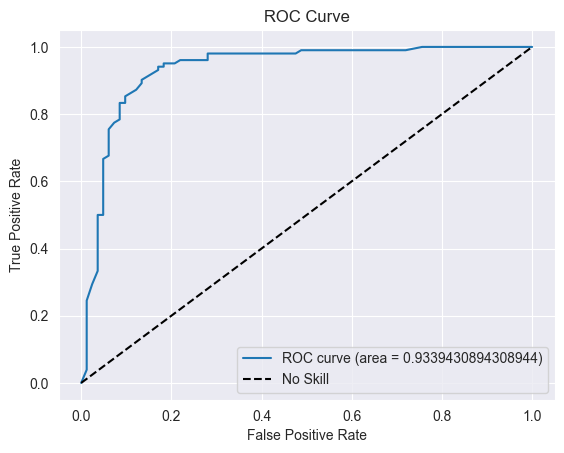

In [55]:
#get probability estimates
y_pred_proba = rand_forest.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
#plotting the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("ROC Curve")
plt.show()

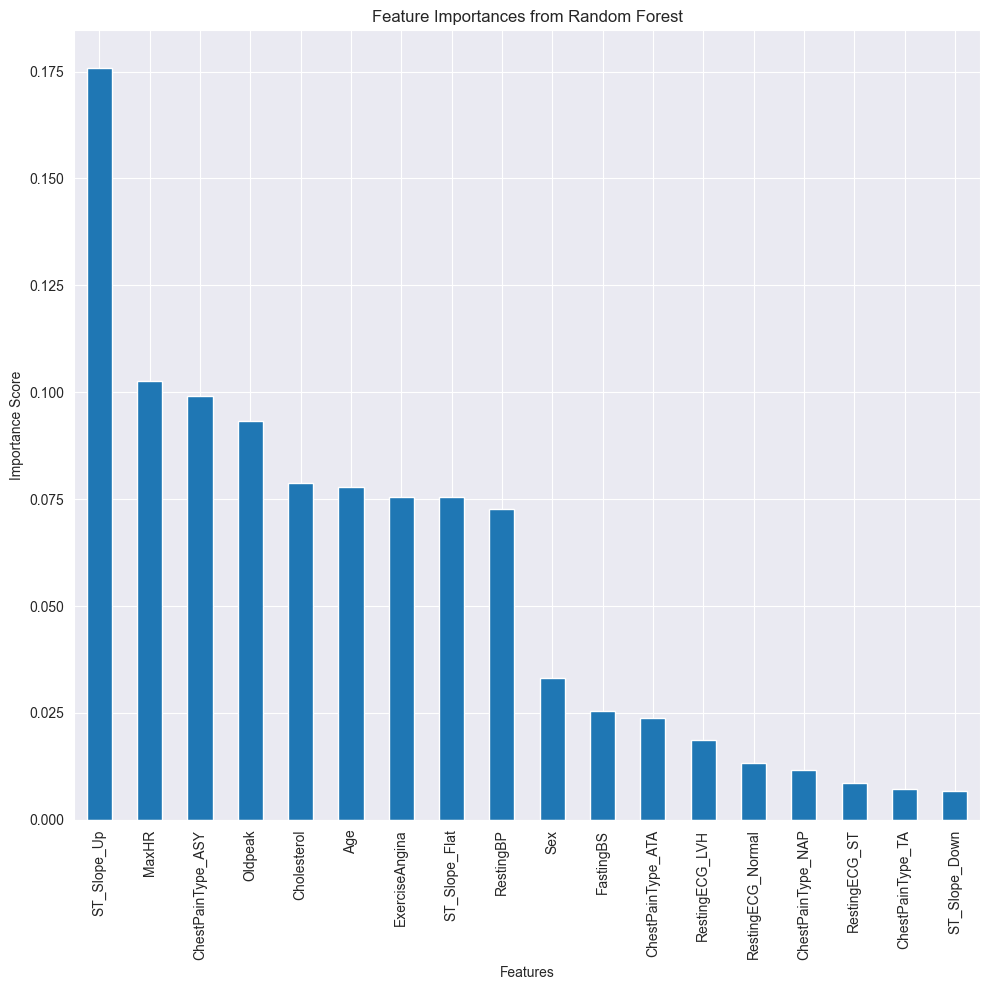

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rand_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
feature_importances.plot.bar()

plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig("feature_importance")
plt.show()